In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import time
import multiprocess
from multiprocess import Pool

num_procs = multiprocess.cpu_count()

In [11]:
df = pd.read_csv('data/series_2018.csv')
airports = pd.read_csv('data/airports.csv')
departures = df[df["departure"].isin(airports["airport"])].copy().drop_duplicates()
arrivals = df[df["arrival"].isin(airports["airport"])].copy().drop_duplicates()
time_ = departures["dep time"].apply(lambda d: datetime.datetime.fromtimestamp(d).time() if not np.isnan(d) else "NaN")
departures["dep time"] = time_
departures["dep time minute"]  = time_.apply(lambda t: np.round(t.hour*60 + t.minute + t.second*0.1)).astype(int)

time_ = arrivals["arr time"].apply(lambda d: datetime.datetime.fromtimestamp(d).time() if not np.isnan(d) else "NaN")
arrivals["arr time"] = time_
arrivals["arr time minute"]  = time_.apply(lambda t: np.round(t.hour*60 + t.minute + t.second*0.1)).astype(int)

In [14]:
flights_departure= departures["callsign"].unique()
flights_arrival= arrivals["callsign"].unique()
flights_departure.shape

(16089,)

In [15]:
def compute(tup):
    fl_dep, dep, time_tolerance, min_occourrency = tup
    regular = 0
    for flight in fl_dep:
        f = dep[dep["callsign"]==flight]["dep time minute"]
        mean, std = f.mean(), f.std()
        if f[(f < mean + time_tolerance) & (f > mean - time_tolerance)].shape[0]/f.shape[0]> min_occourrency:
            regular += 1
    return regular

In [16]:
from itertools import product
tol = [30,35,40, 45,50,55, 60]
min_oc = [0.70,0.75,0.80,0.85,0.90,0.95]
grid = list(product(tol, min_oc))
    

## Per week day

(10332,)
(30, 0.7)
paritial 10.049870014190674
(30, 0.75)
paritial 9.941025733947754
(30, 0.8)
paritial 9.12758183479309
(30, 0.85)
paritial 9.655641555786133
(30, 0.9)
paritial 9.73478388786316
(30, 0.95)
paritial 9.885231733322144
(35, 0.7)
paritial 9.266402244567871
(35, 0.75)
paritial 9.56409502029419
(35, 0.8)
paritial 9.753149509429932
(35, 0.85)
paritial 9.733518123626709
(35, 0.9)
paritial 9.593790531158447
(35, 0.95)
paritial 9.547518730163574
(40, 0.7)
paritial 9.48238754272461
(40, 0.75)
paritial 9.65624189376831
(40, 0.8)
paritial 9.693936109542847
(40, 0.85)
paritial 9.57289981842041
(40, 0.9)
paritial 9.619523763656616
(40, 0.95)
paritial 9.834315061569214
(45, 0.7)
paritial 9.821638345718384
(45, 0.75)
paritial 9.619006633758545
(45, 0.8)
paritial 9.545506477355957
(45, 0.85)
paritial 9.704251289367676
(45, 0.9)
paritial 9.288161754608154
(45, 0.95)
paritial 9.674376010894775
(50, 0.7)
paritial 9.41688871383667
(50, 0.75)
paritial 9.340880155563354
(50, 0.8)
paritial 9.8

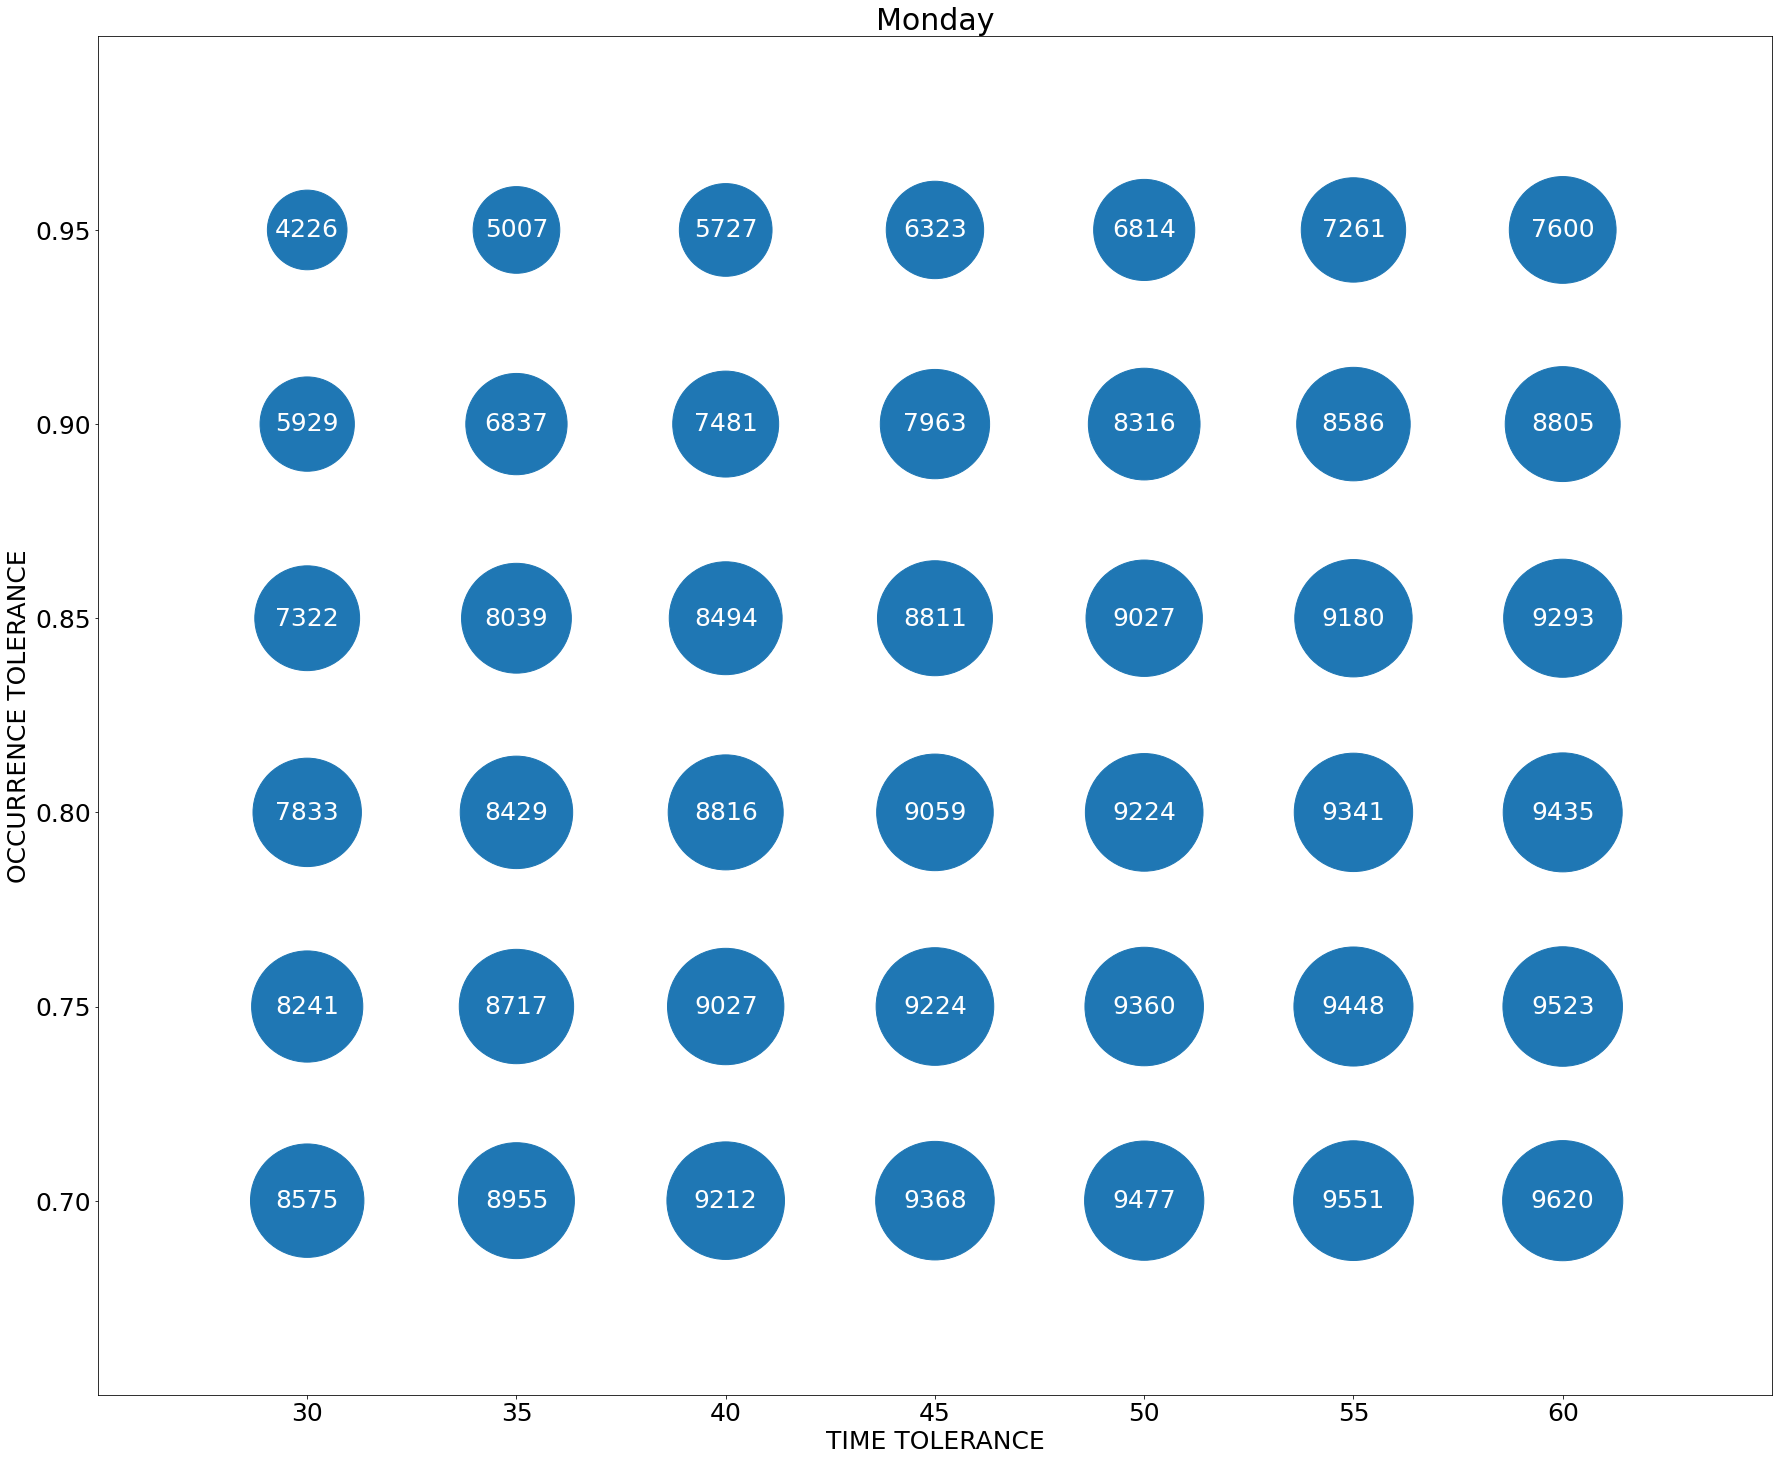

0
(10173,)
(30, 0.7)
paritial 9.605881690979004
(30, 0.75)
paritial 9.235636711120605
(30, 0.8)
paritial 9.553029775619507
(30, 0.85)
paritial 9.198158979415894
(30, 0.9)
paritial 9.49490761756897
(30, 0.95)
paritial 9.55009913444519
(35, 0.7)
paritial 9.567701578140259
(35, 0.75)
paritial 9.582077503204346
(35, 0.8)
paritial 9.582846641540527
(35, 0.85)
paritial 9.30435299873352
(35, 0.9)
paritial 9.864557266235352
(35, 0.95)
paritial 9.616251707077026
(40, 0.7)
paritial 9.58505392074585
(40, 0.75)
paritial 9.319267749786377
(40, 0.8)
paritial 9.72839069366455
(40, 0.85)
paritial 9.72406530380249
(40, 0.9)
paritial 9.752909421920776
(40, 0.95)
paritial 9.818212747573853
(45, 0.7)
paritial 9.518203258514404
(45, 0.75)
paritial 9.117393732070923
(45, 0.8)
paritial 9.706928730010986
(45, 0.85)
paritial 9.450594902038574
(45, 0.9)
paritial 9.624497890472412
(45, 0.95)
paritial 9.774883270263672
(50, 0.7)
paritial 9.261868000030518
(50, 0.75)
paritial 9.920623779296875
(50, 0.8)
paritial 9

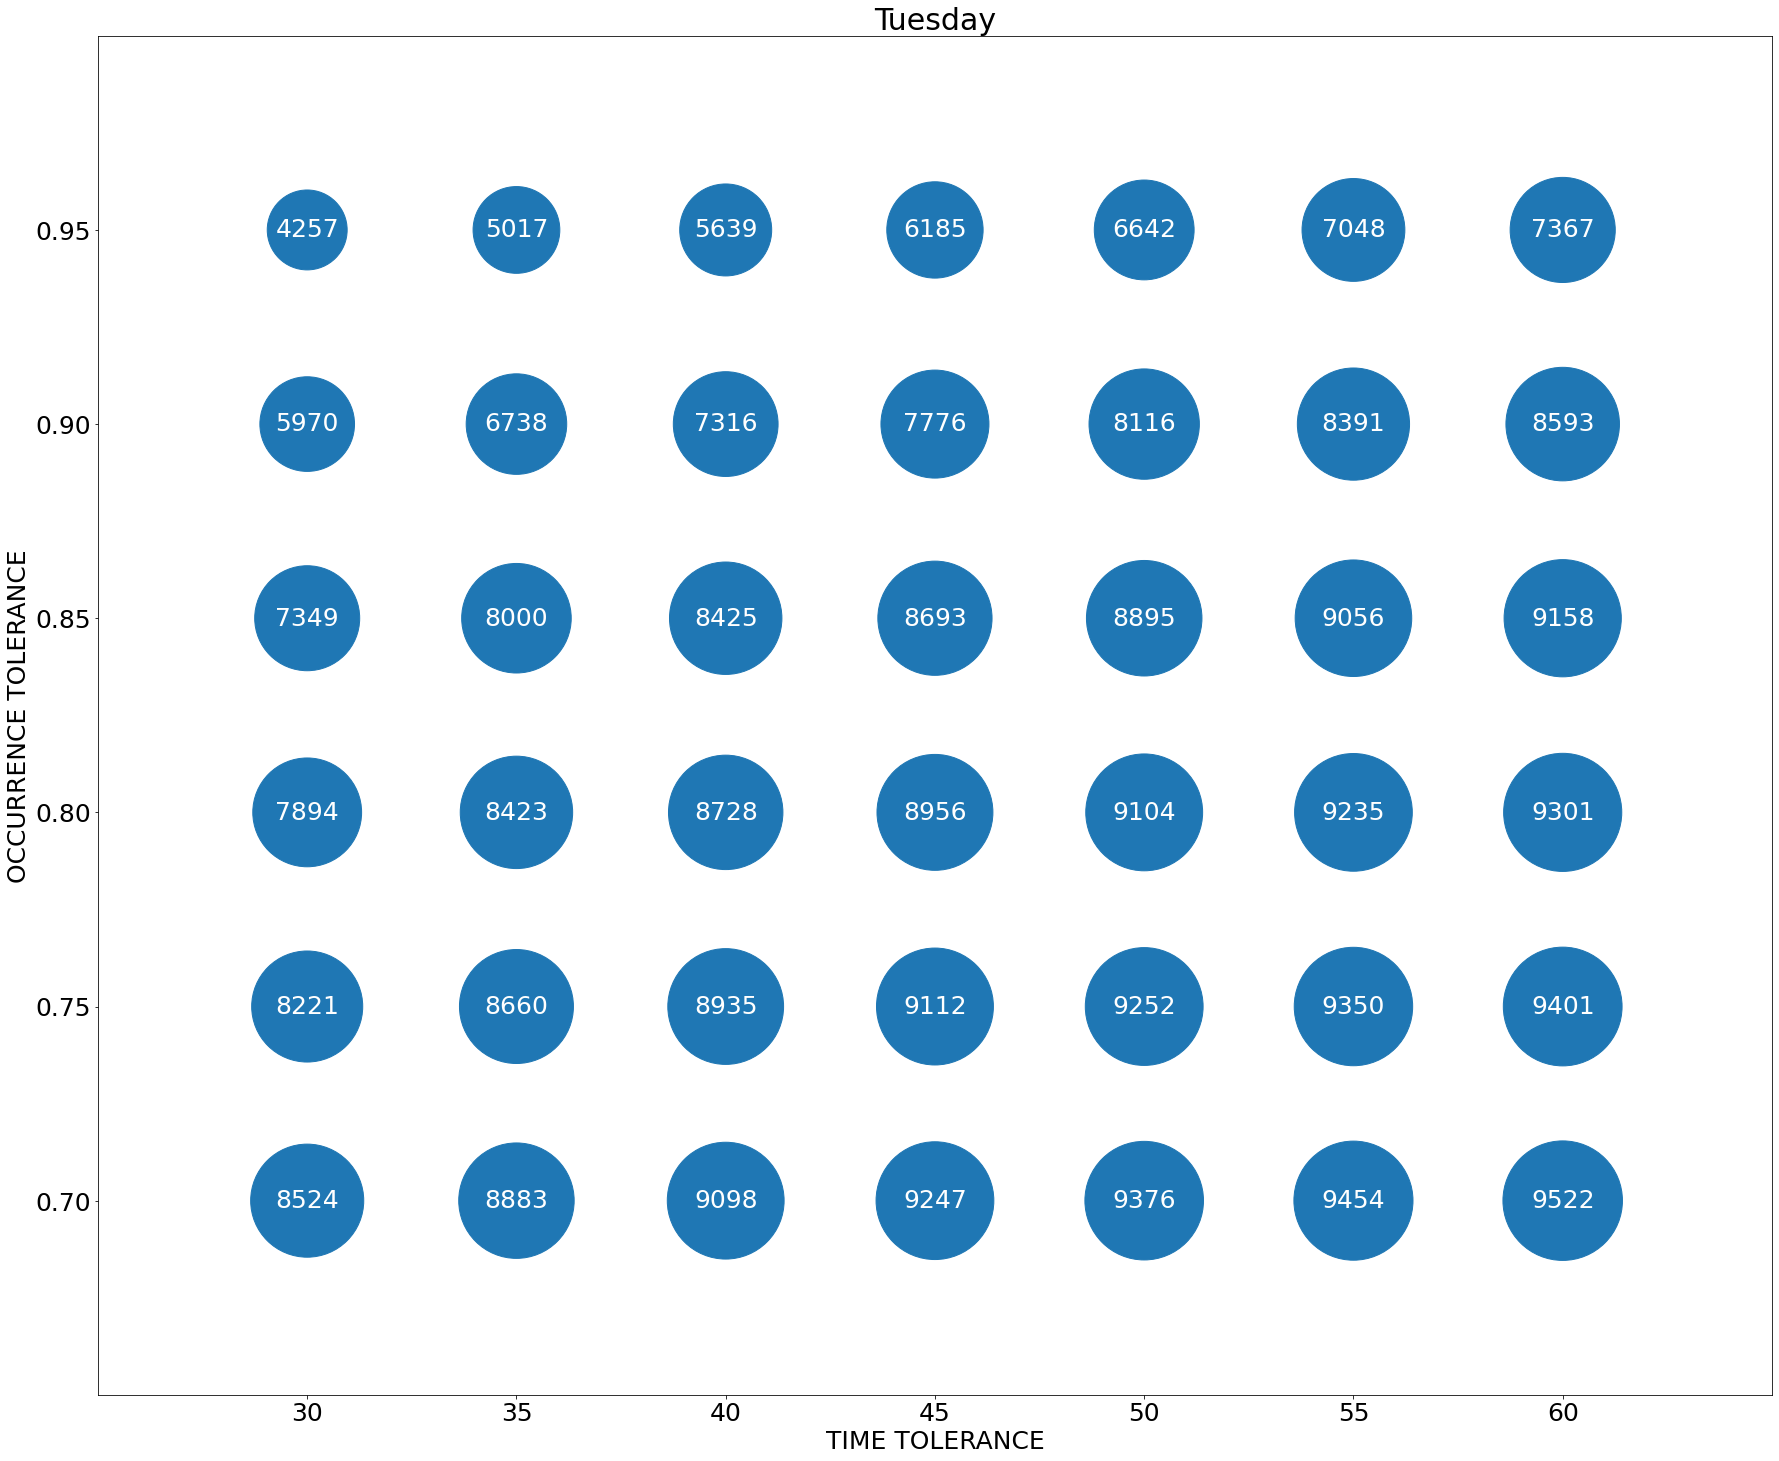

1
(10317,)
(30, 0.7)
paritial 9.734279155731201
(30, 0.75)
paritial 9.860809564590454
(30, 0.8)
paritial 9.636971473693848
(30, 0.85)
paritial 9.819717645645142
(30, 0.9)
paritial 9.878944396972656
(30, 0.95)
paritial 9.667273759841919
(35, 0.7)
paritial 9.574302911758423
(35, 0.75)
paritial 10.003774404525757
(35, 0.8)
paritial 9.986961841583252
(35, 0.85)
paritial 9.60863709449768
(35, 0.9)
paritial 9.969218492507935
(35, 0.95)
paritial 9.92910122871399
(40, 0.7)
paritial 9.682101964950562
(40, 0.75)
paritial 9.454430341720581
(40, 0.8)
paritial 9.963819742202759
(40, 0.85)
paritial 10.226685762405396
(40, 0.9)
paritial 9.283578872680664
(40, 0.95)
paritial 9.185811281204224
(45, 0.7)
paritial 9.488771677017212
(45, 0.75)
paritial 10.01091194152832
(45, 0.8)
paritial 9.893734455108643
(45, 0.85)
paritial 9.963687658309937
(45, 0.9)
paritial 9.417781829833984
(45, 0.95)
paritial 9.96255874633789
(50, 0.7)
paritial 9.779660940170288
(50, 0.75)
paritial 9.879096746444702
(50, 0.8)
parit

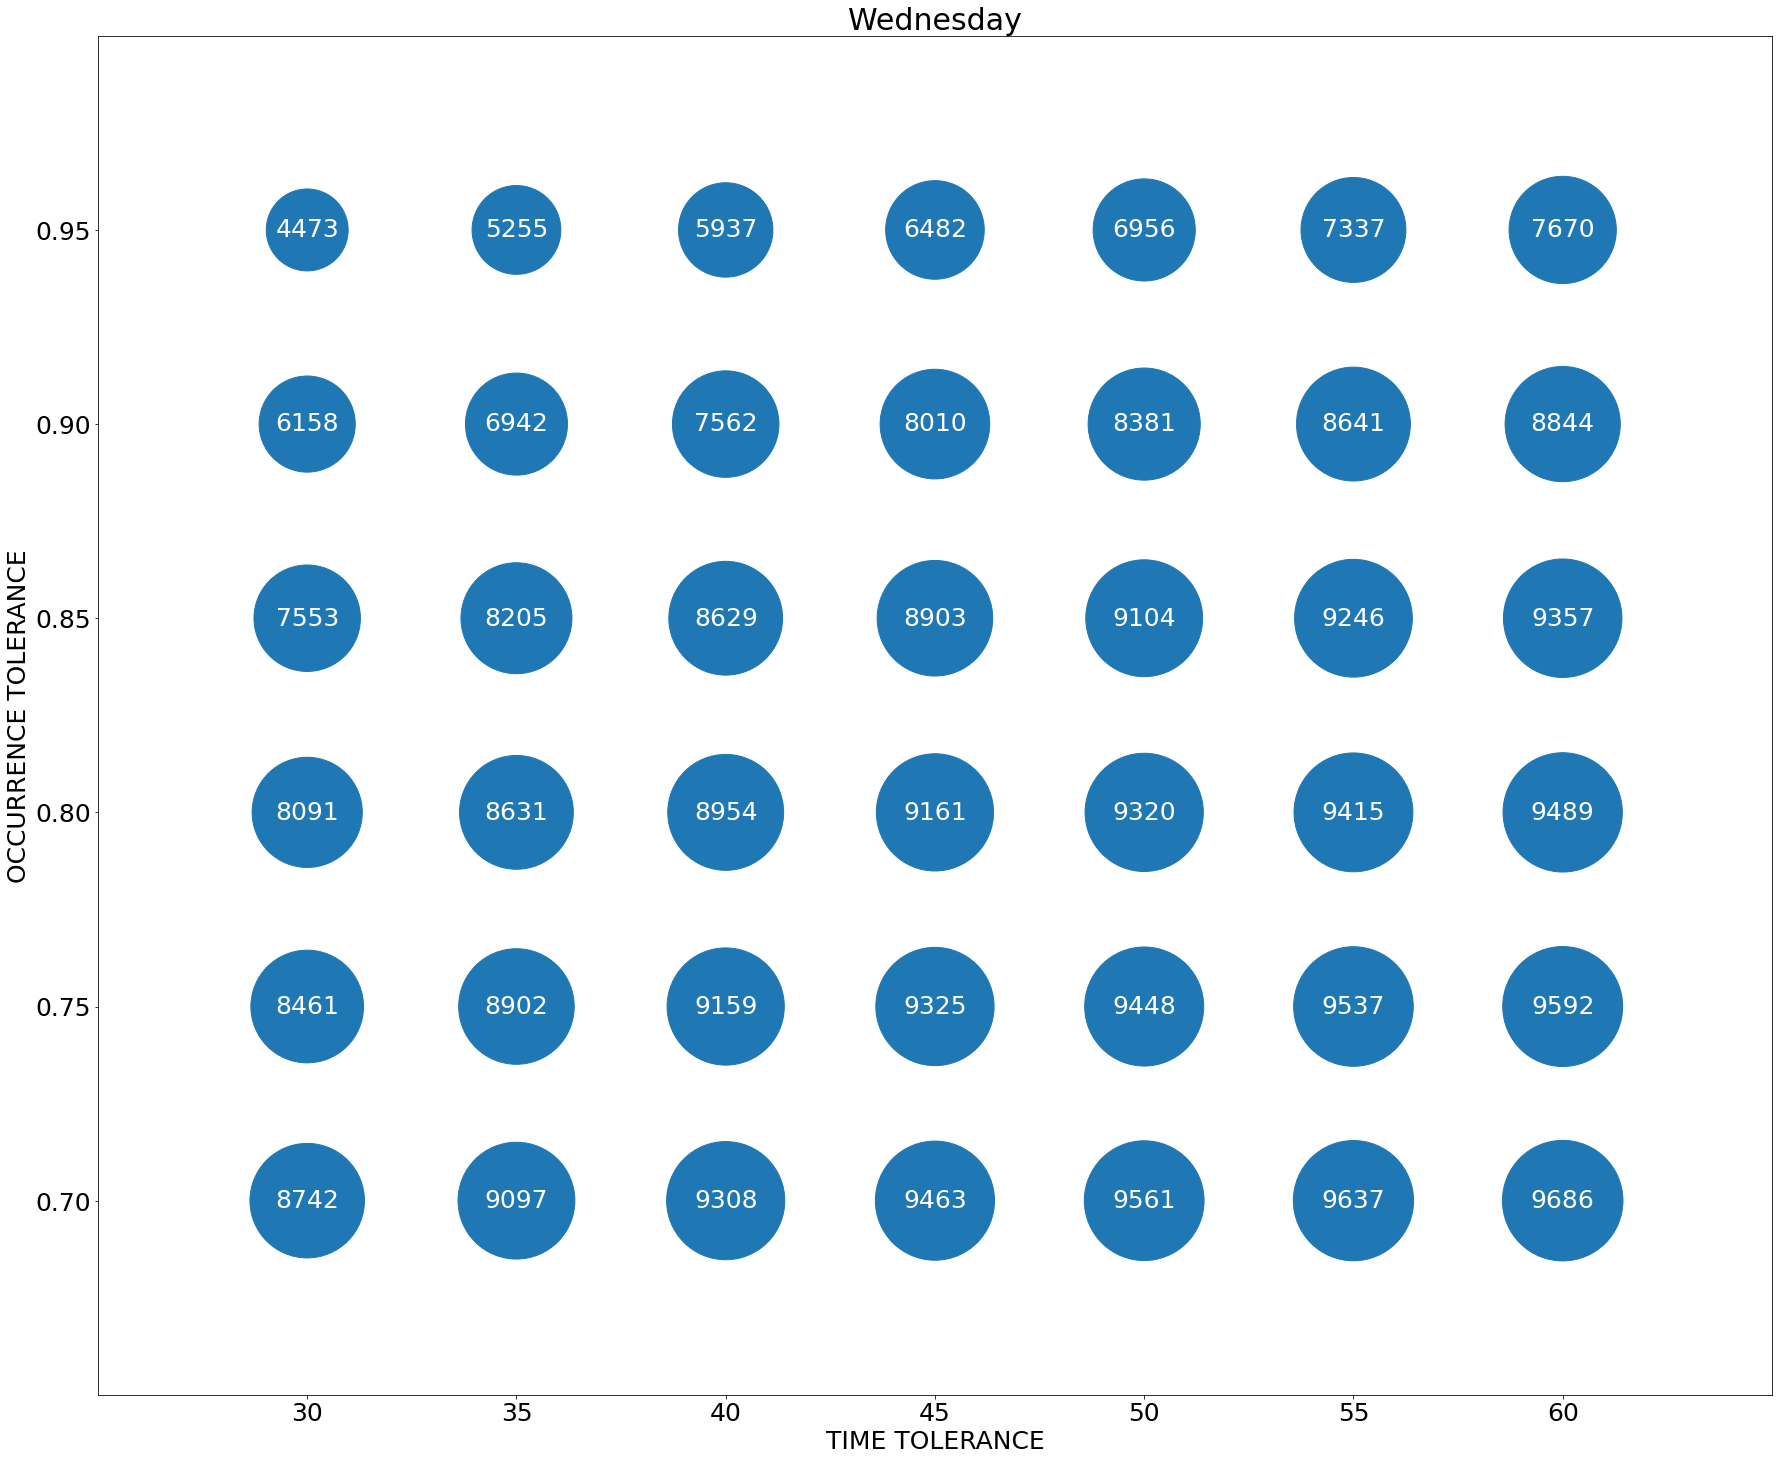

2
(10398,)
(30, 0.7)
paritial 9.479148387908936
(30, 0.75)
paritial 9.872193813323975
(30, 0.8)
paritial 9.756959438323975
(30, 0.85)
paritial 9.534400701522827
(30, 0.9)
paritial 9.809856176376343
(30, 0.95)
paritial 9.758790493011475
(35, 0.7)
paritial 9.9991774559021
(35, 0.75)
paritial 10.084395170211792
(35, 0.8)
paritial 9.927182674407959
(35, 0.85)
paritial 9.874140501022339
(35, 0.9)
paritial 9.502872228622437
(35, 0.95)
paritial 9.640307664871216
(40, 0.7)
paritial 9.546900987625122
(40, 0.75)
paritial 9.75525689125061
(40, 0.8)
paritial 9.714985609054565
(40, 0.85)
paritial 9.75538682937622
(40, 0.9)
paritial 9.608142852783203
(40, 0.95)
paritial 9.105293989181519
(45, 0.7)
paritial 9.592851400375366
(45, 0.75)
paritial 9.83758544921875
(45, 0.8)
paritial 9.480428457260132
(45, 0.85)
paritial 9.745510816574097
(45, 0.9)
paritial 9.680644512176514
(45, 0.95)
paritial 9.723169088363647
(50, 0.7)
paritial 9.61679196357727
(50, 0.75)
paritial 9.710682153701782
(50, 0.8)
paritial 

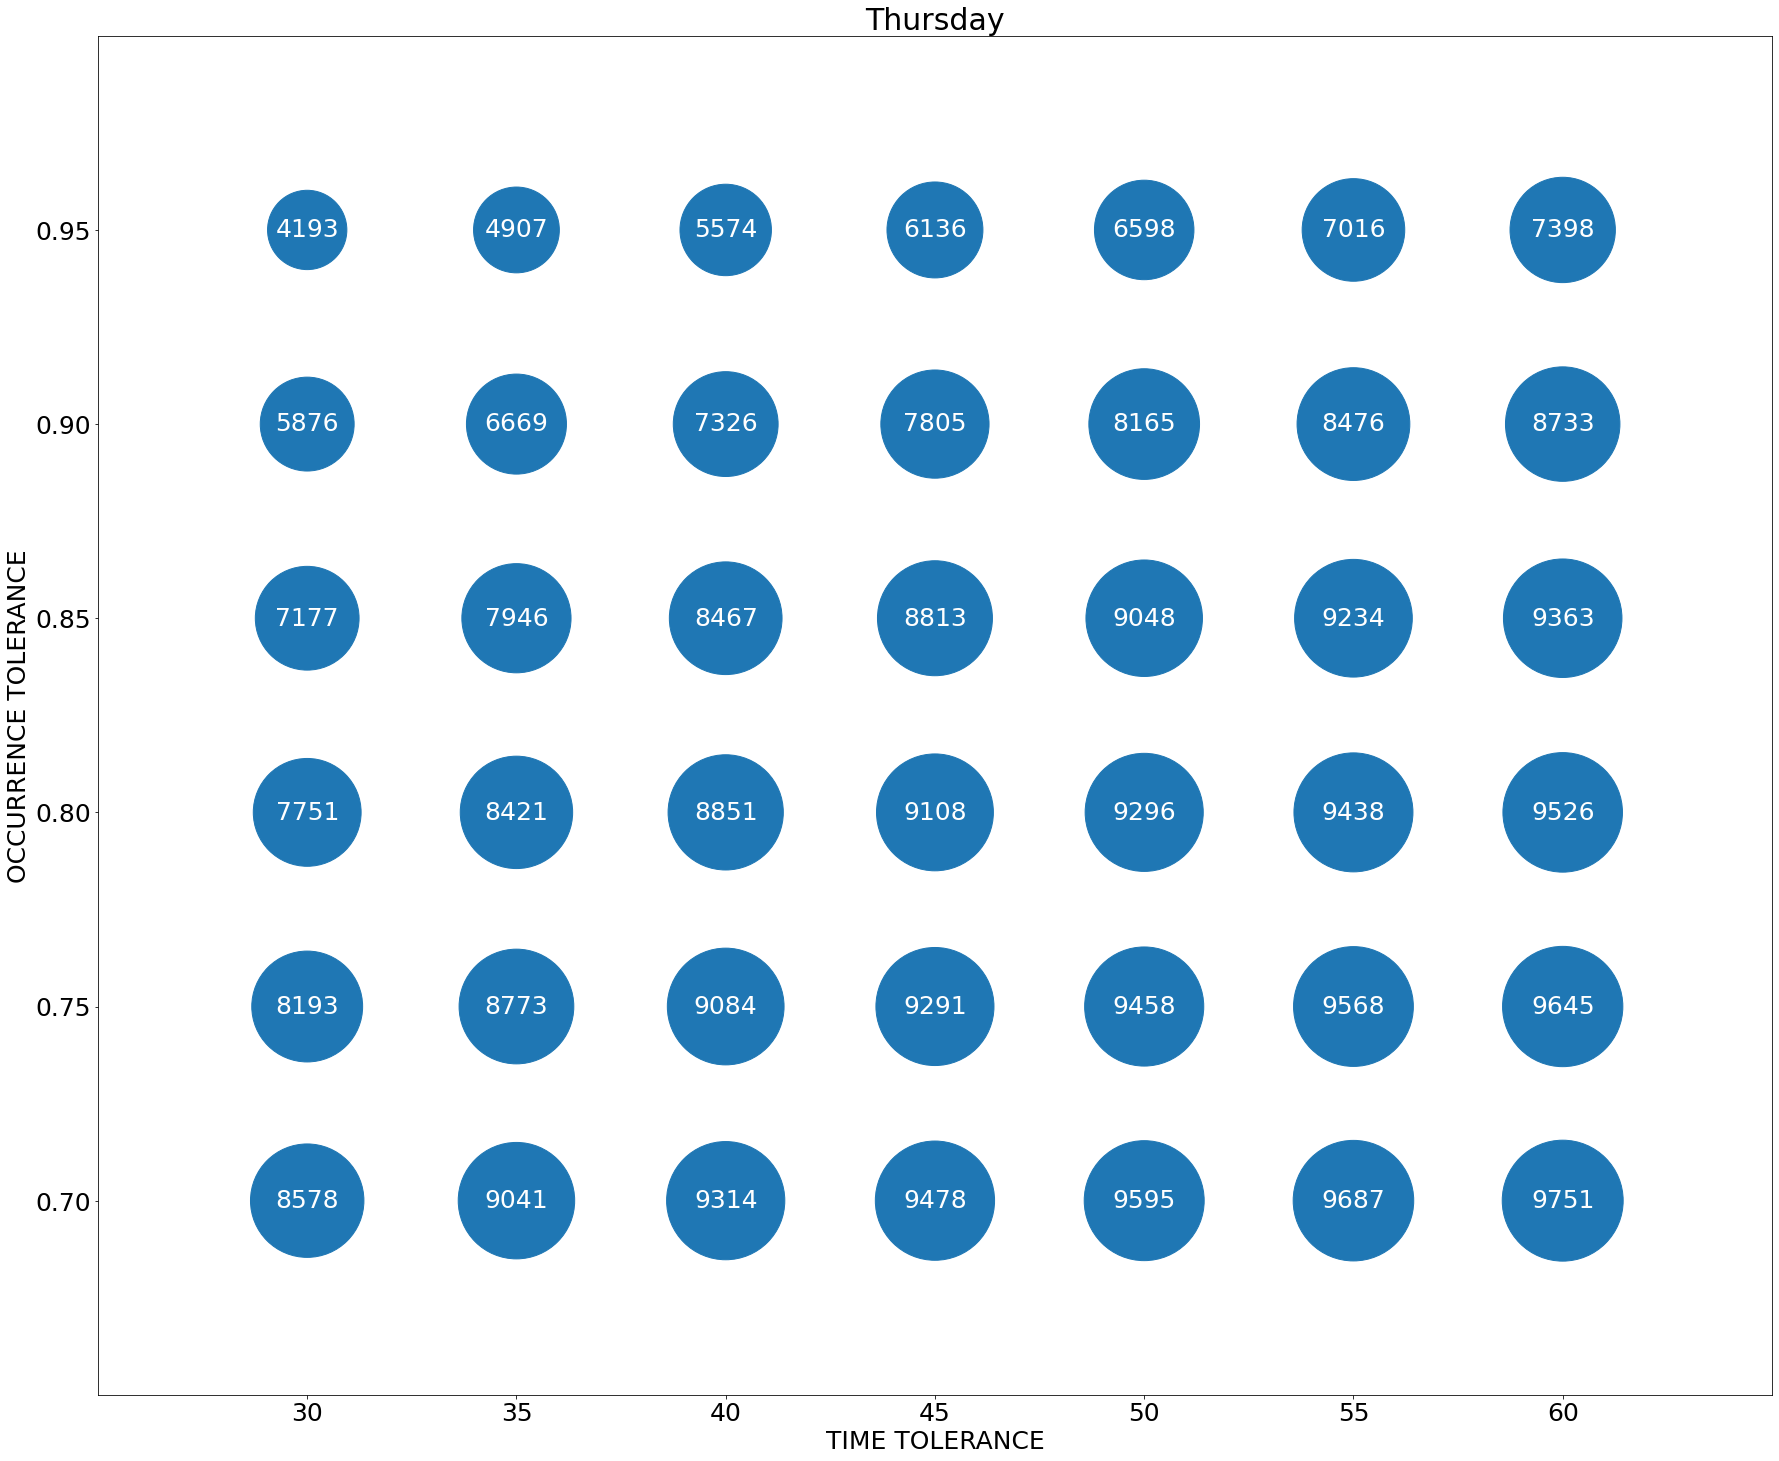

3
(10293,)
(30, 0.7)
paritial 8.955698490142822
(30, 0.75)
paritial 9.155974626541138
(30, 0.8)
paritial 9.100417137145996
(30, 0.85)
paritial 9.327773809432983
(30, 0.9)
paritial 8.84443211555481
(30, 0.95)
paritial 9.057976245880127
(35, 0.7)
paritial 9.18249225616455
(35, 0.75)
paritial 9.351029872894287
(35, 0.8)
paritial 9.253231287002563
(35, 0.85)
paritial 9.162526607513428
(35, 0.9)
paritial 9.2826669216156
(35, 0.95)
paritial 8.766477584838867
(40, 0.7)
paritial 9.16058874130249
(40, 0.75)
paritial 8.783175230026245
(40, 0.8)
paritial 8.931763648986816
(40, 0.85)
paritial 8.73412537574768
(40, 0.9)
paritial 9.062343120574951
(40, 0.95)
paritial 9.207247972488403
(45, 0.7)
paritial 9.478647947311401
(45, 0.75)
paritial 8.753793716430664
(45, 0.8)
paritial 8.890309572219849
(45, 0.85)
paritial 9.130335330963135
(45, 0.9)
paritial 9.220326662063599
(45, 0.95)
paritial 9.113802671432495
(50, 0.7)
paritial 9.004563570022583
(50, 0.75)
paritial 8.602409601211548
(50, 0.8)
paritial 9

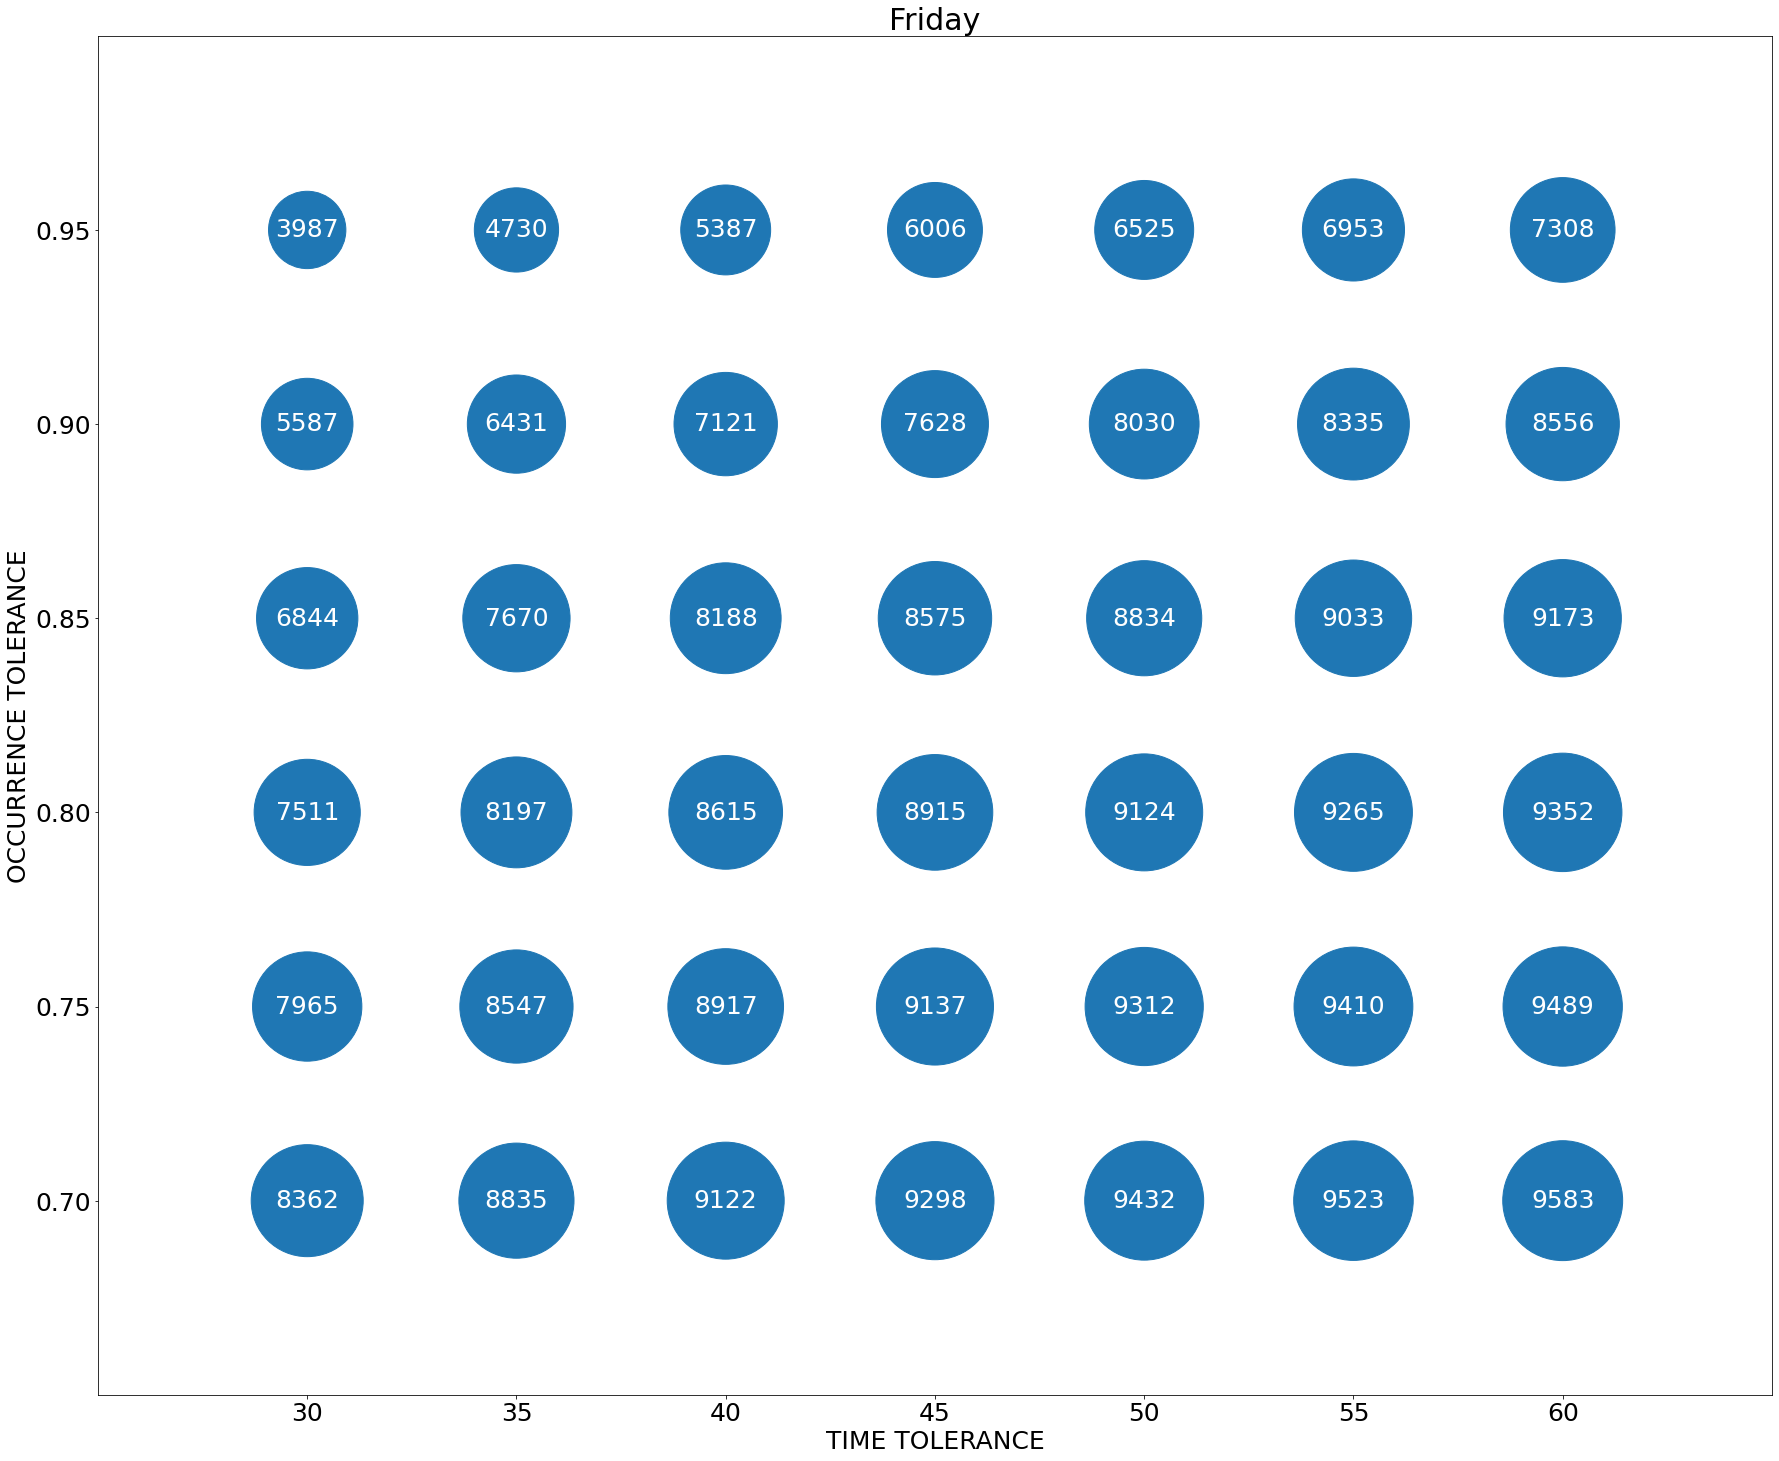

4
(8433,)
(30, 0.7)
paritial 6.80441689491272
(30, 0.75)
paritial 7.204902172088623
(30, 0.8)
paritial 6.788734197616577
(30, 0.85)
paritial 6.617743253707886
(30, 0.9)
paritial 6.975370407104492
(30, 0.95)
paritial 6.733813524246216
(35, 0.7)
paritial 6.636293411254883
(35, 0.75)
paritial 6.628949165344238
(35, 0.8)
paritial 7.065542221069336
(35, 0.85)
paritial 7.0073161125183105
(35, 0.9)
paritial 6.986060619354248
(35, 0.95)
paritial 6.856739521026611
(40, 0.7)
paritial 7.215939521789551
(40, 0.75)
paritial 6.629446506500244
(40, 0.8)
paritial 6.877814531326294
(40, 0.85)
paritial 6.902703523635864
(40, 0.9)
paritial 6.498542785644531
(40, 0.95)
paritial 6.943801403045654
(45, 0.7)
paritial 7.17826509475708
(45, 0.75)
paritial 6.967968463897705
(45, 0.8)
paritial 6.725116491317749
(45, 0.85)
paritial 7.0639870166778564
(45, 0.9)
paritial 6.756483554840088
(45, 0.95)
paritial 6.7691497802734375
(50, 0.7)
paritial 6.7754011154174805
(50, 0.75)
paritial 6.864614963531494
(50, 0.8)
par

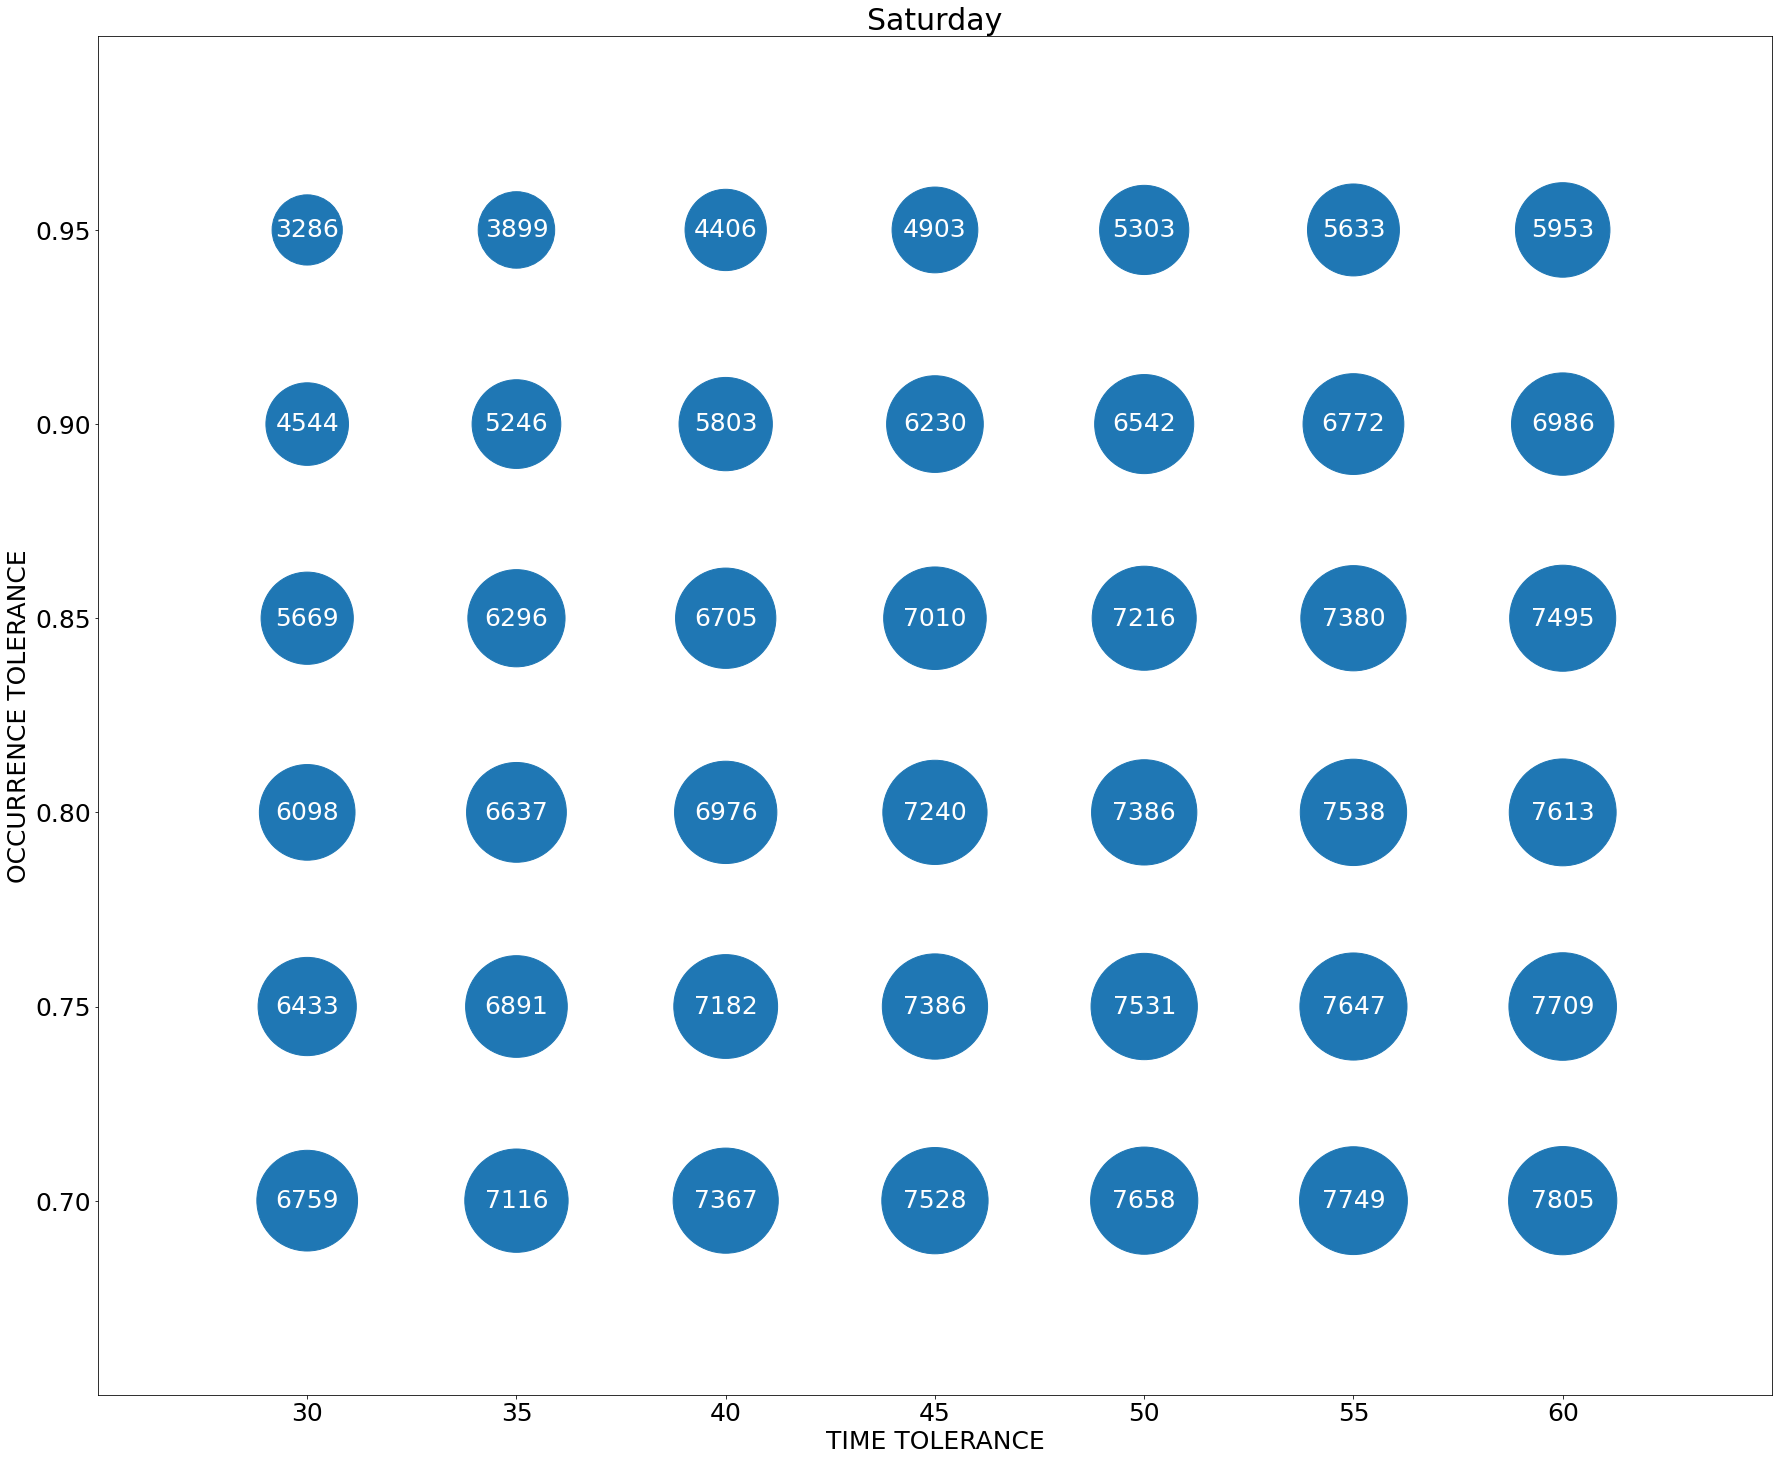

5
(9685,)
(30, 0.7)
paritial 8.750494241714478
(30, 0.75)
paritial 8.441559791564941
(30, 0.8)
paritial 8.877531051635742
(30, 0.85)
paritial 8.367058038711548
(30, 0.9)
paritial 8.188064336776733
(30, 0.95)
paritial 8.403455018997192
(35, 0.7)
paritial 8.524964570999146
(35, 0.75)
paritial 8.378226041793823
(35, 0.8)
paritial 8.349614381790161
(35, 0.85)
paritial 8.712159156799316
(35, 0.9)
paritial 8.24239182472229
(35, 0.95)
paritial 8.97746205329895
(40, 0.7)
paritial 8.31509017944336
(40, 0.75)
paritial 8.26619839668274
(40, 0.8)
paritial 8.316516399383545
(40, 0.85)
paritial 7.9417884349823
(40, 0.9)
paritial 8.82286024093628
(40, 0.95)
paritial 8.5401611328125
(45, 0.7)
paritial 8.56100058555603
(45, 0.75)
paritial 8.194663047790527
(45, 0.8)
paritial 8.982654333114624
(45, 0.85)
paritial 8.210050344467163
(45, 0.9)
paritial 8.320679426193237
(45, 0.95)
paritial 8.641215801239014
(50, 0.7)
paritial 8.604527235031128
(50, 0.75)
paritial 8.330838680267334
(50, 0.8)
paritial 8.5487

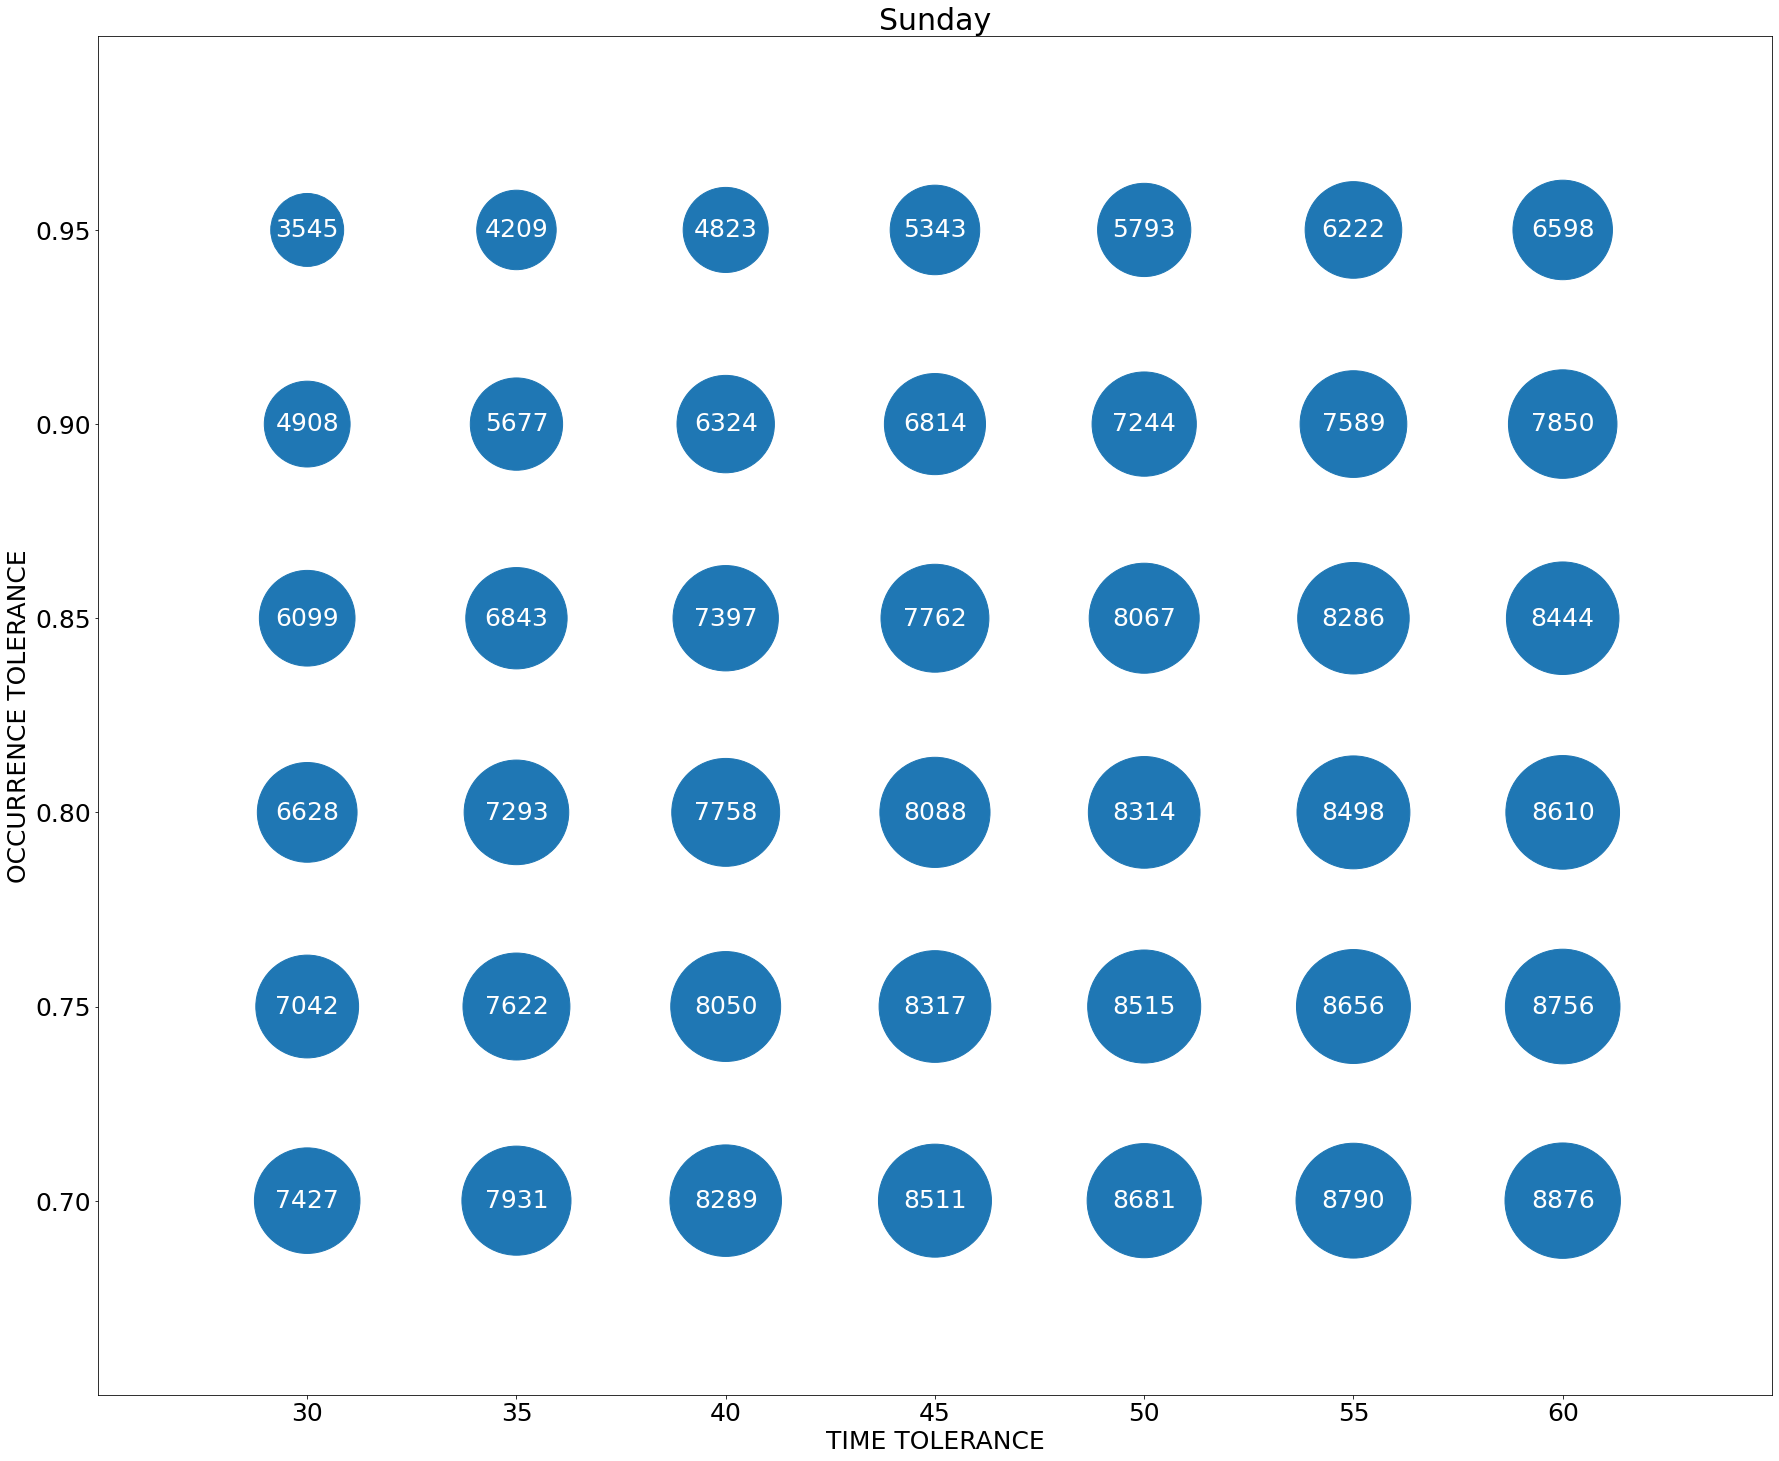

6


In [17]:
day =["Monday", "Tuesday", "Wednesday", "Thursday","Friday", "Saturday", "Sunday"]
for j in range(7):
    departures_day =departures[departures["week day"]==j]
    flights_departure= departures_day["callsign"].unique()
    print(flights_departure.shape)
    len_slice = flights_departure.shape[0]//num_procs
    split_fl = [i*len_slice for i in range(num_procs)] + [flights_departure.shape[0]]
    fls = []
    t = time.time()
    for point in grid:
        partial_time = time.time()
        print(point)
        time_tolerance = point[0]
        min_occourrency = point[1]
        split_flights = tuple([(flights_departure[split_fl[i]:split_fl[i+1]], departures_day[departures_day["callsign"].isin(flights_departure[split_fl[i]:split_fl[i+1]])], time_tolerance,min_occourrency) for i in range(num_procs)])
        pool = Pool(num_procs)
        fls.append(sum(pool.map(compute, split_flights)))
        pool.close()
        pool.join()
        print("paritial", time.time()-partial_time)

    print("time total: ",time.time()-t)

    fls = np.array(fls)
    plt.rcParams["figure.figsize"] = (30,25)
    plt.rcParams["font.size"] = 25
    points = np.array(grid).T
    plt.xticks(tol)
    plt.yticks(min_oc)
    plt.xlabel("TIME TOLERANCE")
    plt.xlim(25,65)
    plt.ylim(0.65,1)
    plt.ylabel("OCCURRENCE TOLERANCE")
    plt.title(day[j])
    for i in range(len(grid)):
        plt.annotate(fls[i],(grid[i][0],grid[i][1]),color='white',horizontalalignment='center',verticalalignment='center')
    plt.scatter(points[0],points[1], s=fls*1.5)
    #plt.savefig("plots/departures_icao"+day[j]+".png")
    plt.show()
    #plt.cla()
    #plt.clf()
    #plt.close()
    print(j)

In [42]:
arrivals

,icao24,dep time,departure,arr time,arrival,callsign,dep dist,dep alt,arr dist,arr alt,candidate dep airports,candidate arr airports,day,week day,series code,series,arr time minute
0,4cc2a7,1.558355e+09,EBBR,17:11:12,BIKF,ICE67K,935.0,42.0,2909.0,39.0,2,0,2019-05-20,0,EBBR_BIKF_ICE67K _0,0,1032
1,4cc2a2,1.559569e+09,EBBR,18:20:29,BIKF,ICE67K,792.0,2.0,2624.0,69.0,2,0,2019-06-03,0,EBBR_BIKF_ICE67K _0,0,1103
2,4cc27b,1.560169e+09,EBBR,17:01:26,BIKF,ICE67K,1511.0,96.0,4266.0,69.0,2,0,2019-06-10,0,EBBR_BIKF_ICE67K _0,0,1024
3,4cc277,1.560775e+09,EBBR,17:17:20,BIKF,ICE67K,918.0,40.0,2650.0,92.0,2,0,2019-06-17,0,EBBR_BIKF_ICE67K _0,0,1039
4,3412d3,1.561983e+09,EBBR,17:30:15,BIKF,ICE67K,487.0,33.0,3049.0,6.0,2,0,2019-07-01,0,EBBR_BIKF_ICE67K _0,0,1052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248337,506c21,1.567965e+09,EDDM,20:21:58,LSZH,ADR33D,2210.0,171.0,385.0,50.0,0,7,2019-09-08,6,LSZH_EDDM_ADR33D _6,73151,1227
1248338,506c21,1.568569e+09,EDDM,20:19:59,LSZH,ADR33D,1821.0,49.0,737.0,88.0,0,7,2019-09-15,6,LSZH_EDDM_ADR33D _6,73151,1225
1248339,71c251,1.567952e+09,LOWW,17:17:27,LSZH,KAL9575,1525.0,38.0,1783.0,42.0,0,7,2019-09-08,6,LSZH_LOWW_KAL9575 _6,73152,1040
1248340,71c251,1.568559e+09,LOWW,17:49:26,LSZH,KAL9575,777.0,83.0,1875.0,88.0,0,7,2019-09-15,6,LSZH_LOWW_KAL9575 _6,73152,1072


## Global std

In [47]:
def compute_std(tup):
    fl_dep, dep, tolerance = tup
    std_list = []
    
    for flight in fl_dep:
        f = dep[dep["callsign"]==flight]["dep time minute"]
        mean, std = f.mean(), f.std()
        std_list.append(std)

    return std_list

In [50]:


t = time.time()

pool = Pool(num_procs)
reg = pool.map(compute_std, split_fl)
pool.close()
pool.join()
print(time.time()-t)


9.776390552520752


In [3]:
import csv

In [6]:
import csv
file = []
with open('data/airports.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter='\t')
    for row in spamreader:
        file.append(row)